# Aquisição dos Dados

Aqui os dados foram baixados usando [Kaggle's API](https://github.com/Kaggle/kaggle-api#api-credentials). Siga o link para instruções de como utilizá-la.

## Para uso no Google's Colab 

In [ ]:
# For google colab only
!pip install kaggle

In [ ]:
# Upload api key kaggle.json
from google.colab import files
files.upload()

In [ ]:
# Create folder /.kaggle
!mkdir -p ~/.kaggle
# Move API key to folder
!cp kaggle.json ~/.kaggle/

## Comece Aqui!

Pesquisar as competições com o termo **taxi**

In [1]:
!kaggle competitions list -s house

ref                                          deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
house-prices-advanced-regression-techniques  2030-01-01 00:00:00  Getting Started  Knowledge       4390            True  


Selecionar a competição de interesse, nesse caso, **New York City Taxi Fare Prediction**.

In [2]:
!kaggle competitions files -c house-prices-advanced-regression-techniques

name                    size  creationDate         
---------------------  -----  -------------------  
sample_submission.csv   31KB  2018-11-28 22:31:52  
test.csv               441KB  2018-11-28 22:31:52  
train.csv              450KB  2018-11-28 22:31:49  
data_description.txt    13KB  2018-11-28 22:31:50  


Finalmente, baixar os arquivos usando a API na pasta `data_house`.

In [2]:
!mkdir data_house

J  existe uma subpasta ou um arquivo data_house.


In [8]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -p data_house


  0%|          | 0.00/31.2k [00:00<?, ?B/s]
100%|##########| 31.2k/31.2k [00:00<00:00, 499kB/s]

  0%|          | 0.00/441k [00:00<?, ?B/s]
100%|##########| 441k/441k [00:00<00:00, 723kB/s]

  0%|          | 0.00/450k [00:00<?, ?B/s]
100%|##########| 450k/450k [00:00<00:00, 1.98MB/s]

  0%|          | 0.00/13.1k [00:00<?, ?B/s]
100%|##########| 13.1k/13.1k [00:00<00:00, 1.34MB/s]


# EDA
Agora que os dados estão disponíveis, podemos explorá-los. Nessa etapa, os dados serão analisados e visualizados com o intuito de se obter insights e informações adicionais.

Inicialmente, vamos dá uma olhada superficial na descrição disponível dos dados. No prórprio site da competição do [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) pode-se notar que os dados correspondem a **81 colunas e 1460 linhas**.


## Features (Colunas)

Analisa algumas das **Features** de cada observação e suas respectivas descrições.

- **Id**: ID única para identificar do imóvel - 🆔
- **SalePrice** : Preço de venda  - 🎯
- **MSSubClass**: Classificação do tipo de construção.
- **MSZoning**: Classificação geral de zona.
- **LotFrontage**: Distancia em pés de rua conectada a propriedade.
- **LotArea**: Tamanho da propriedade dem pés quadrados.
- **Street** : Tipo de acesso pela estrada.
- **Alley** : Tipo de acesso por becos.
- **LotShape**: Planicidade de propriedade.
- **LandCountour** : Tipo de acesso pela estrada.
- **Utilities** : Tipo de serviços disponíveis.
- **LotConfig**: Configuração do lote.
- **LandSlope** : Inclinação da propriedade.
- ...

In [3]:
# Import EDA libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [4]:
# Load data
train = pd.read_csv("data_house/train.csv", infer_datetime_format=True)

In [5]:
# Brief visualization
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Brief infomatin
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Vamos observar algumas estatísticas das colunas.

In [7]:
# Brief description
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Features
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Size
train.shape

(1460, 81)

## Limpeza

Agora que temos uma noção geral dos dados, vamos realizar algumas operações para verificar se se há dados faltando, duplicados ou outras inconsistências.

In [10]:
# Look for duplicates
train.duplicated().sum()

0

In [11]:
# Look for missing data
train.isna().sum().sum()

6965

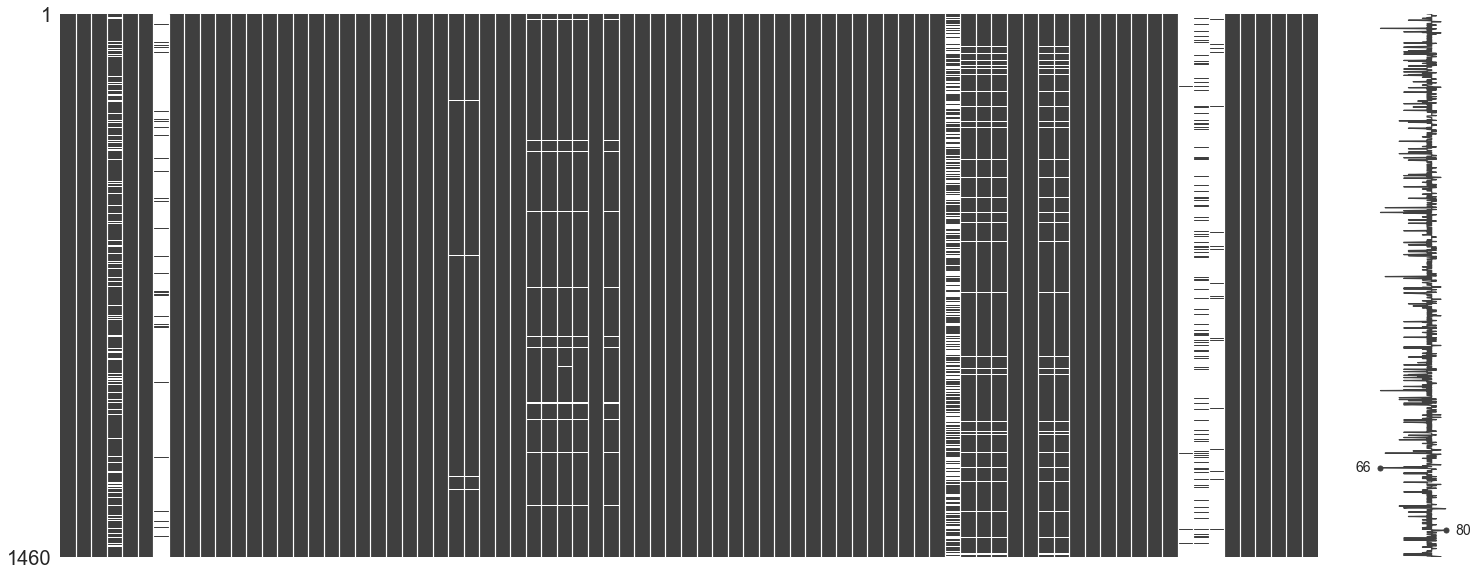

In [12]:
msno.matrix(train)

In [13]:
miss_count = train.isna().sum()
miss_count = miss_count[miss_count > 0]
miss_count

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

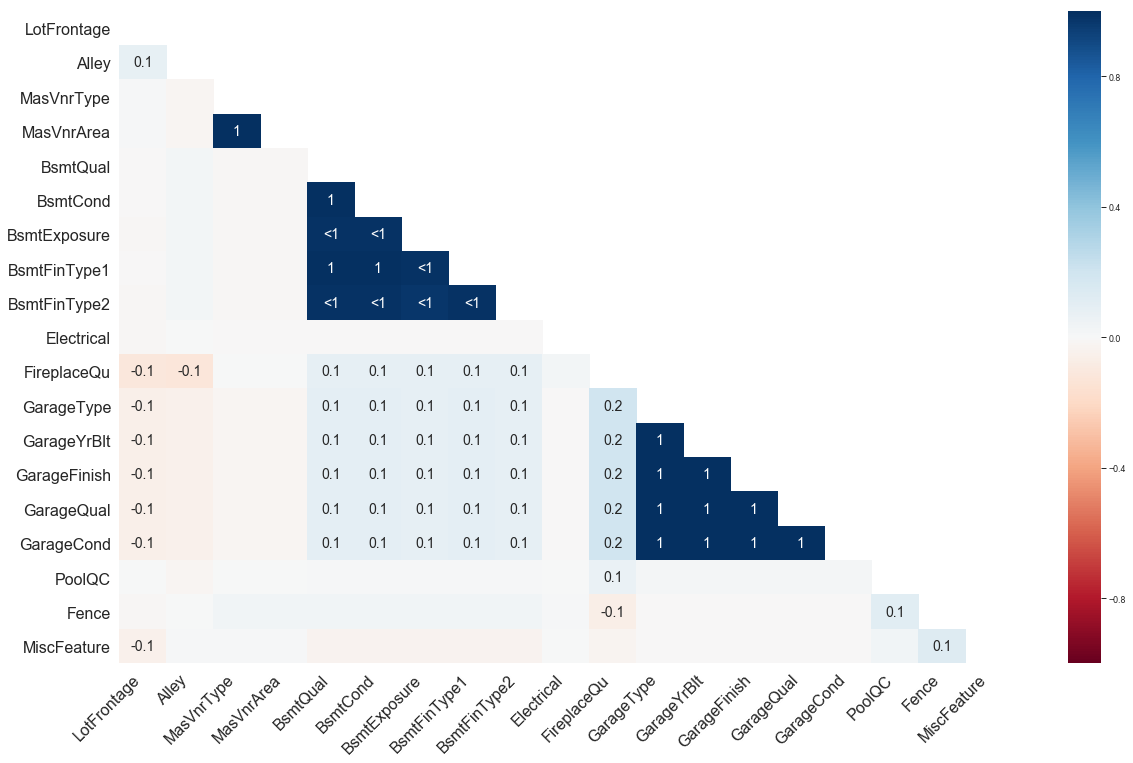

In [14]:
# Shows which missings values occurs simultaneously on both columns
ax = msno.heatmap(train, cmap='RdBu')

In [15]:
# Show unique values in missing columns
def get_unique_values_col(df):
    data = {}
    for col, s in df.iteritems():
        data[col] = s.unique()
    return pd.Series(data)
unique_mc = get_unique_values_col(train[miss_count.index])
unique_mc

LotFrontage     [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...
Alley                                           [nan, Grvl, Pave]
MasVnrType                    [BrkFace, None, Stone, BrkCmn, nan]
MasVnrArea      [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...
BsmtQual                                    [Gd, TA, Ex, nan, Fa]
BsmtCond                                    [TA, Gd, nan, Fa, Po]
BsmtExposure                                [No, Gd, Mn, Av, nan]
BsmtFinType1                  [GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]
BsmtFinType2                  [Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]
Electrical                 [SBrkr, FuseF, FuseA, FuseP, Mix, nan]
FireplaceQu                             [nan, TA, Gd, Fa, Ex, Po]
GarageType      [Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...
GarageYrBlt     [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....
GarageFinish                                 [RFn, Unf, Fin, nan]
GarageQual                              [TA, Fa, Gd, nan, Ex, Po]
GarageCond

Temos dados muitos ricos, porém escassos. Nesse caso, remover observações com valores faltando é inaceitável.

Pode-se notar que os conjuntos de colunas abaixo possuem dados faltando em simultaneamente:

- `MasVnrType` e `MasVnrArea`: **8**.
- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1` e `BsmtFinType2`: **37/38**.
- `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual` e `GarageCond`: **81**.

Temos que lidar com os dados faltando de cada tipo feature individualmente. As abordagens usadas foram:

- **Categóricas**: Olhando as descrição das features, vemos que, com excepção da `MasVnrType`, as variáveis `NaN` significa a falta da feature. Então, vamos adicionar uma categoria `None` para os dados faltando, e assumir que os dados faltando na categoria `MasVnrType` seja a ausência da feature. Além disso, vamos definir as variáveis numéricas `MSSubClass`, `OverallQual` e `OverallCond` como categóricas, conforme a sua descrição.

- **Numéricas**: Imputar os valores que façam sentido com o que a variável representa.
  - `LotFrontage`: Vamos substituir os valores faltando pela **mediana** da coluna.
  - `MasVnrArea `: Como assumimos que os valores faltando são ausência da feature, substituímos por **0**.
  - `GarageYrBlt`: Como nesses casos não existe garagem, vamos subtituí-lo por um valor impossível que lhe dê destaque, nesse caso **0**.

In [16]:
# Cleaned data
c_train = train.copy()

# Imput categorical columns
miss_cat_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PoolQC', 'Fence', 'MiscFeature']
c_train[miss_cat_cols] = train[miss_cat_cols].fillna('None')

# Tranform numerical variables in categorical variables
cat_feat = ['MSSubClass', 'OverallQual', 'OverallCond'] + list(train.select_dtypes('object').columns)
c_train[cat_feat] = c_train[cat_feat].astype('category')

print(f"Empty entries: {c_train[miss_cat_cols].isna().sum().sum()}")
c_train[miss_cat_cols].head()

Empty entries: 0


,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,None,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,None,Attchd,RFn,TA,TA,None,None,None
1,None,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,None,None,None
2,None,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,None,None,None
3,None,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,None,None,None
4,None,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,None,None,None


In [17]:
from sklearn.preprocessing import Imputer

# Imput numeric columns
c_train['LotFrontage'] = train.LotFrontage.fillna(train.LotFrontage.median())
c_train['MasVnrArea'] = train.MasVnrArea.fillna(0)
c_train['GarageYrBlt'] = train.GarageYrBlt.fillna(0)

print(f"Empty entries: {c_train.isna().sum().sum()}")
c_train.head()

Empty entries: 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


## Visualizar os Dados

Agora que só temos dados completos e não duplicados, vamos verificar a consistência dos valores das colunas. Para isso, iremos plotar algumas visualizações.

In [18]:
c_train.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Variáveis Numéricas

c:\program files\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


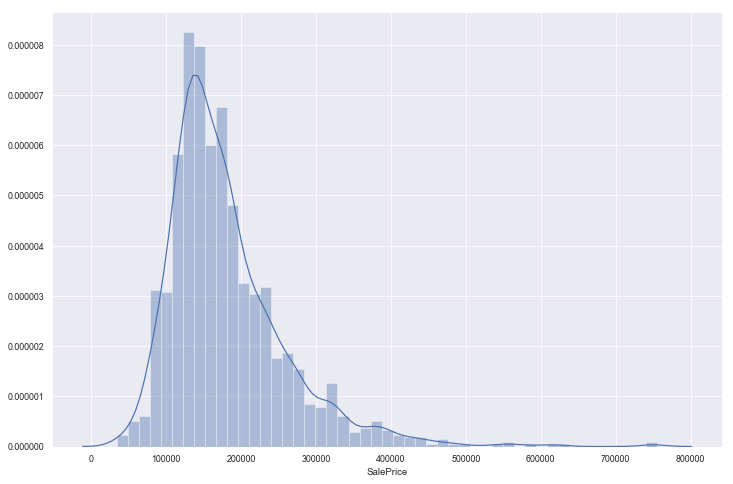

In [19]:
# Look at Target variable
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(c_train.SalePrice, ax=ax)

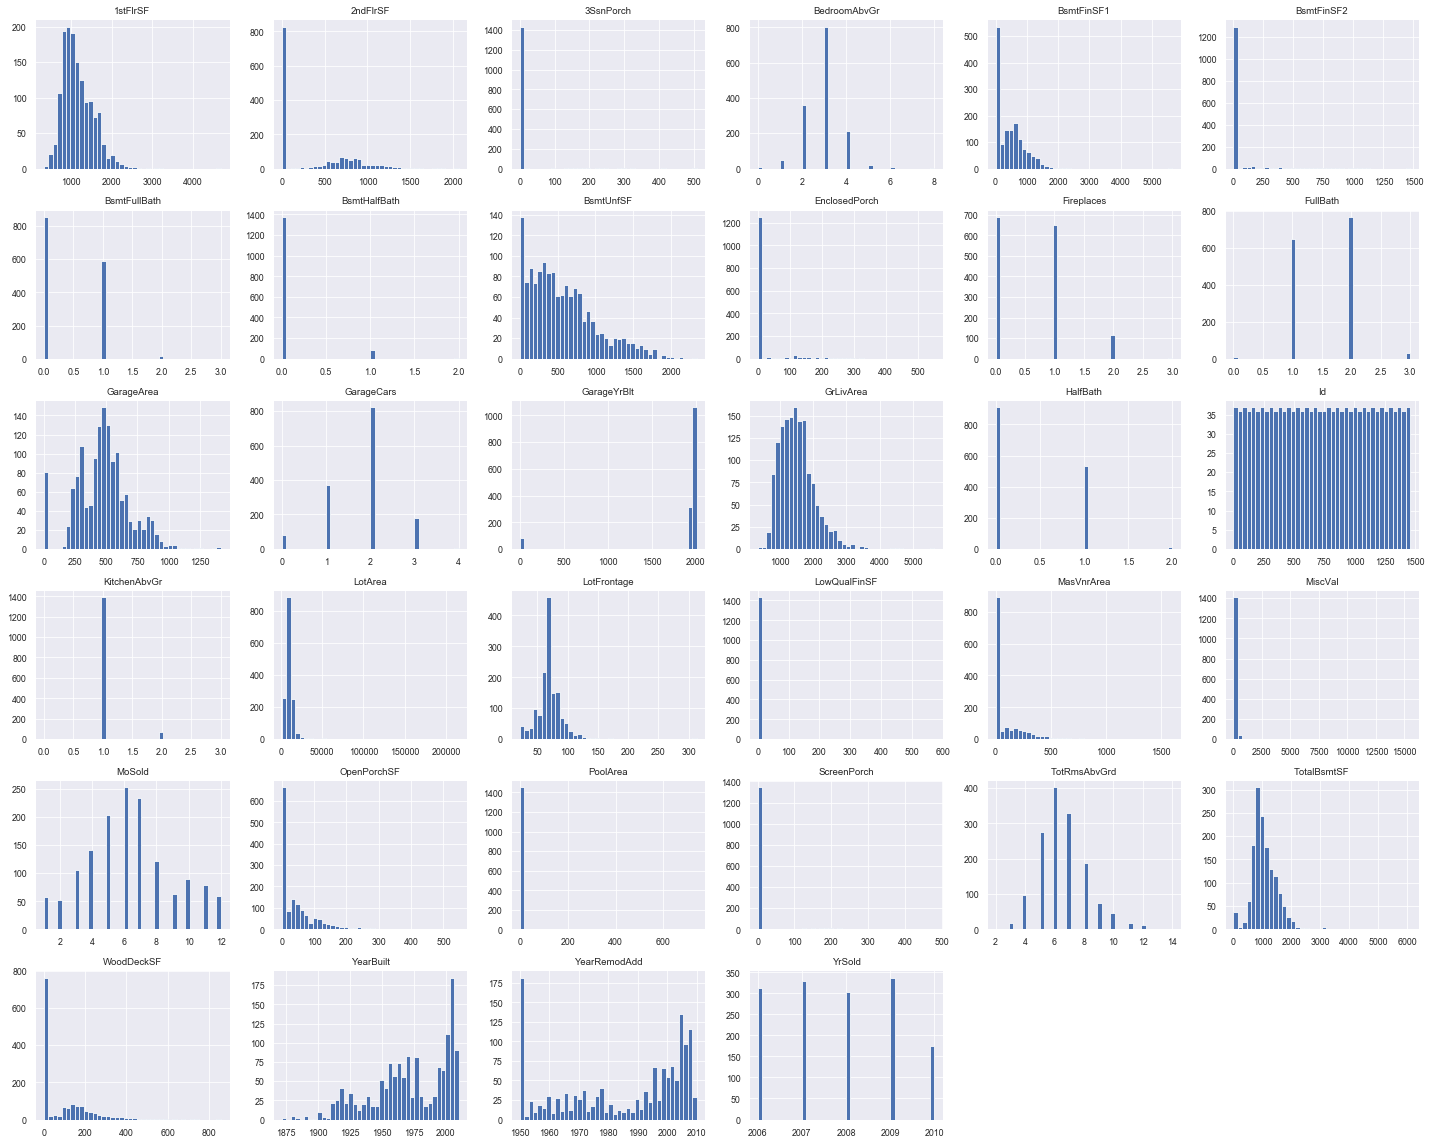

In [20]:
c_train.drop('SalePrice', axis=1).hist(bins=40, figsize=(20, 16))
plt.tight_layout()

## Variáveis Categóricas

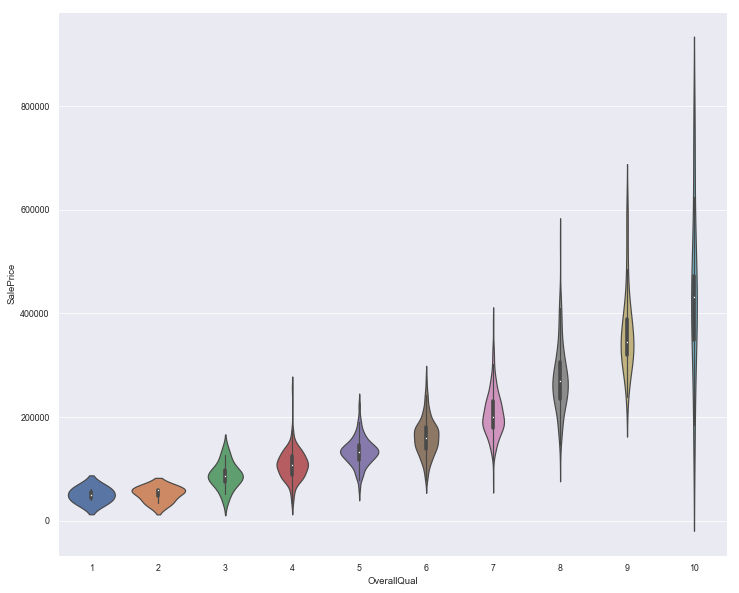

In [21]:
# Some of the main categorical features
fig, ax = plt.subplots(figsize=(12,10))
sns.violinplot(x='OverallQual', y='SalePrice', data=c_train, ax=ax)

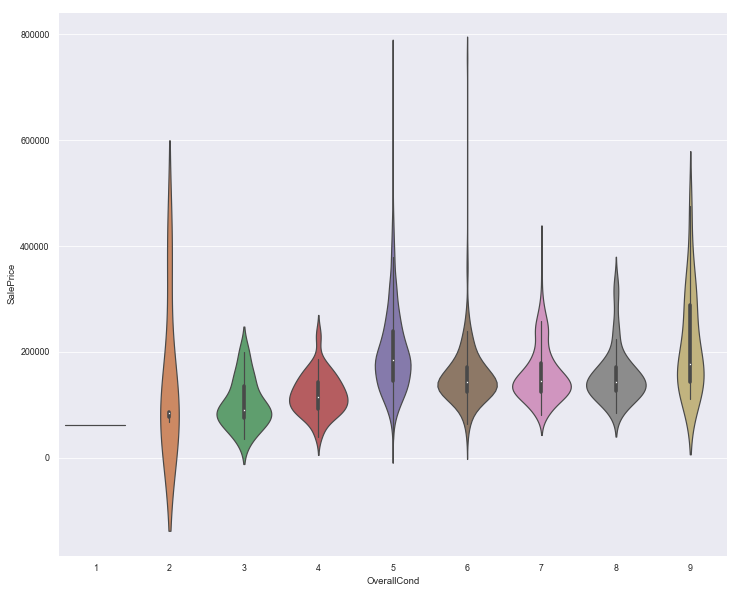

In [22]:
# Some of the main categorical features
fig, ax = plt.subplots(figsize=(12,10))
sns.violinplot(x='OverallCond', y='SalePrice', data=c_train, ax=ax)

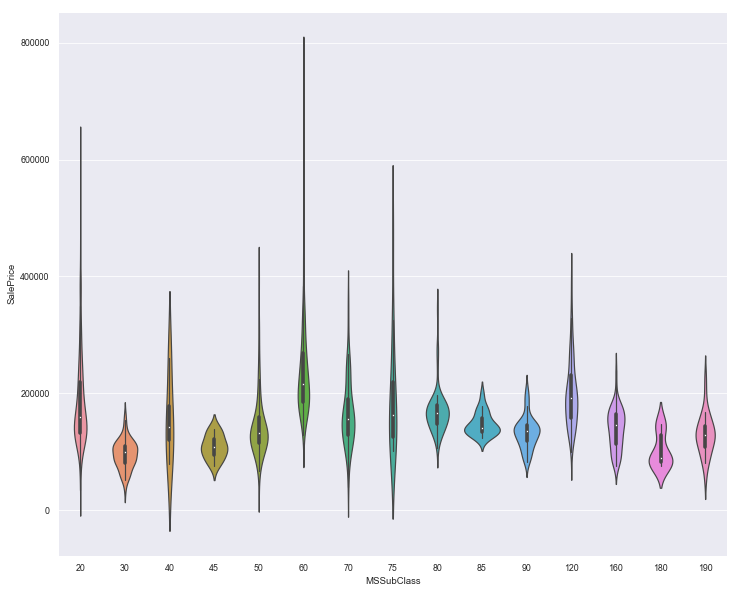

In [23]:
# Some of the main categorical features
fig, ax = plt.subplots(figsize=(12,10))
sns.violinplot(x='MSSubClass', y='SalePrice', data=c_train, ax=ax)

Nesse caso, considerando os dados de fontes confiáveis, remover outlier pode ser um problema.

Isso fica claro quando verificamos que boa parte dos valores que parecem ser outliers são representados dessa forma devido a não existência da feature mostrado pelo alto pico em 0.

**Assim, não haverá a remoção de outliers.**

## Procurar por Correlações

Verificando as correlações das variáveis com a nossa variável alvo, podemos tirar conclusões sobre as variáveis mais **importantes** ou possívelmente **redudantes**.
### Variáveis Numéricas

In [24]:
num_corr_matrix = c_train.corr()
num_corr_target = num_corr_matrix['SalePrice'].sort_values(ascending=False)

Text(0.5, 1.0, 'Correlation with Sale Price')

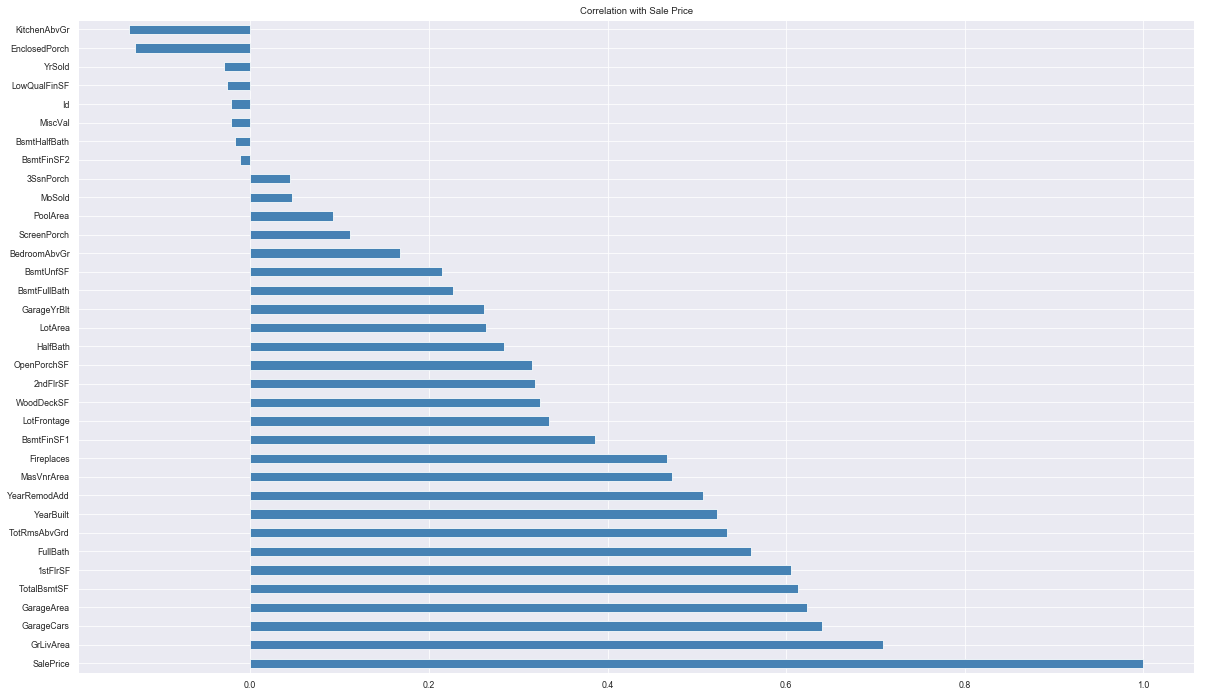

In [25]:
num_corr_target.plot.barh(color='steelblue', figsize=(20, 12));
plt.title('Correlation with Sale Price')

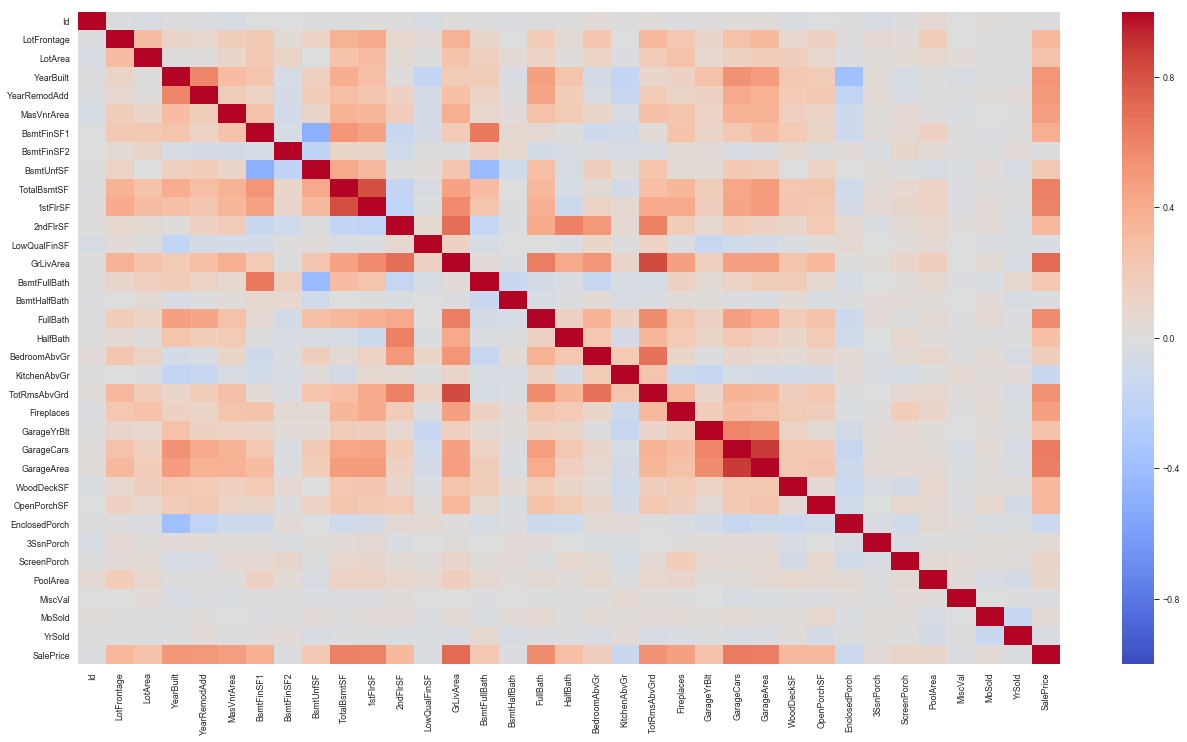

In [26]:
fig, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(num_corr_matrix, ax=ax, annot=False, cmap='coolwarm', vmin=-1., vmax=1.)

### Variáveis Categóricas
Nese caso, usaremos o [Correlation Ratio](https://en.wikipedia.org/wiki/Correlation_ratio) para criar um valor numérico que indique a influência da categoria no nosso valor numérico.

In [27]:
# Correlation ratio definition
def correlation_ratio(categories, measurements):
    """
    Calculate the correlation ratio between the categoryes and the measurement
    
    Args: 
        categories: Iterable with categories
        measurements: Iterable with the measurements
    
    Return:
        eta: Correlation ratio
    """
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

Text(0.5, 1.0, 'Correlation with Sale Price')

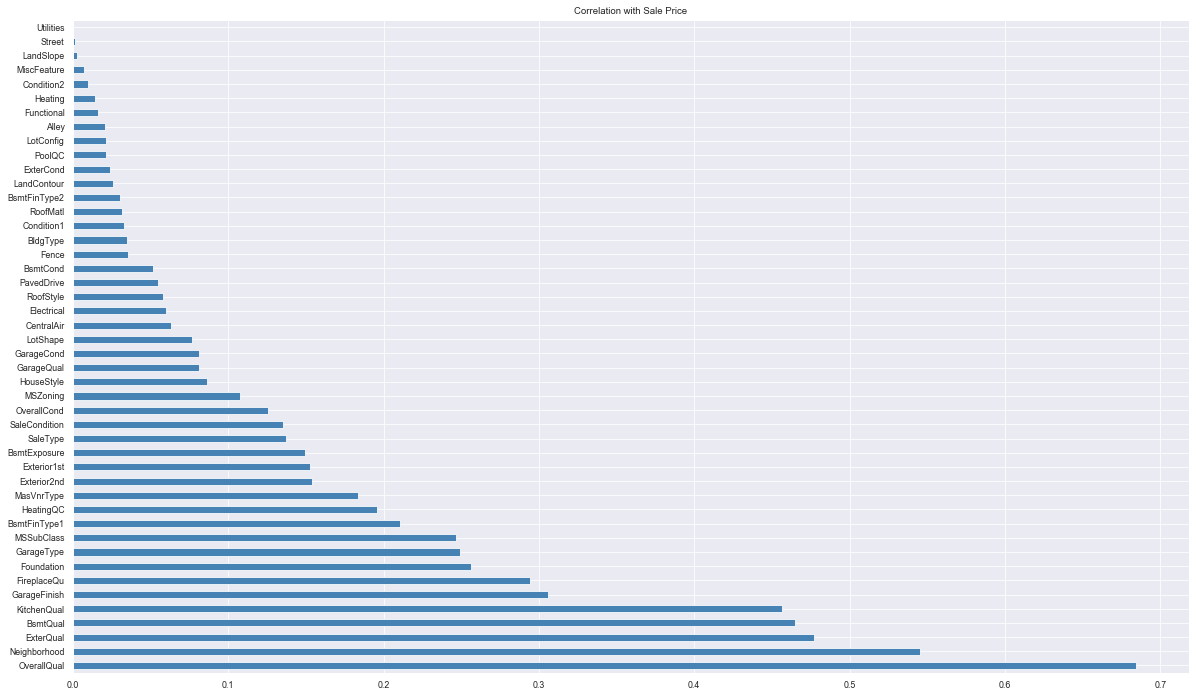

In [28]:
# Categorical feature correlated with numeric target
cat_cols = c_train.select_dtypes('category').columns
cat_corr_target = pd.Series([correlation_ratio(c_train[c], c_train['SalePrice']) for c in cat_cols], index=cat_cols)

cat_corr_target.sort_values(ascending=False).plot.barh(color='steelblue', figsize=(20, 12));
plt.title('Correlation with Sale Price')

Podemos perceber algumas coisas:
- A variável numérica de maior correlação é `GrLivArea`, áre de habitação no térreo.
- A variável categórica de maior correlação é `OverallQual`, qualidade geral dos materiais e acabamento.
- Correlações entre variáveis mostrando redundância, como `GarageCars` e `GarageArea`.
- Variáveis com pouca influência na variável alvo.

Vamos tentar sanar alguns desses problemas no próximo tópico.

## Feature Engineering

Aqui vamos tentar combinar/manipular as colunas para que as informações presentes nelas e a correlação com a variável alvo fiquem o mais claro possível.


### Seleção de Features

Vendo o **heatmap** anterior podemos perceber que algumas features apresentam pouquíssima correlação com as variáveis alvo. Adicionalmente, fica claro que algumas possuem uma correlação muito próxima e acabam sendo informação redudante.

- Remover features com correlação absoluta com a variável alvo menor que **0.1**.
- Remover uma das features com correlação absoluta entre si maior que **0.8**.


In [29]:
# Removendo Variáveis de baixa correlação com o alvo
thres_t = 0.1
num_corr_matrix = c_train.corr()
cols_target = num_corr_matrix['SalePrice'][(num_corr_matrix['SalePrice'] > thres_t) |
                                           (num_corr_matrix['SalePrice'] < -thres_t)].sort_values(ascending=True).index
cols_target

Index(['KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch', 'BedroomAbvGr',
       'BsmtUnfSF', 'BsmtFullBath', 'GarageYrBlt', 'LotArea', 'HalfBath',
       'OpenPorchSF', '2ndFlrSF', 'WoodDeckSF', 'LotFrontage', 'BsmtFinSF1',
       'Fireplaces', 'MasVnrArea', 'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd',
       'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'GrLivArea', 'SalePrice'],
      dtype='object')

In [30]:
new_num_corr_matrix = c_train[cols_target].corr()

In [31]:
# Removing numeric variable highly correlated
thres_i = 0.8
cols_corr = {}
for c in cols_target:
    series = new_num_corr_matrix[c].drop(c)
    if np.any([np.any(series > thres_i), np.any(series < -thres_i)]):
        cols_corr[c] = series.idxmax()
# Select just one of the pair with highest correlation
remove_cols = set([k if new_num_corr_matrix['SalePrice'][k] < new_num_corr_matrix['SalePrice'][v] else v for k, v in cols_corr.items() ])
n_cols = [c for c in cols_target if c not in remove_cols]
n_cols

['KitchenAbvGr',
 'EnclosedPorch',
 'ScreenPorch',
 'BedroomAbvGr',
 'BsmtUnfSF',
 'BsmtFullBath',
 'GarageYrBlt',
 'LotArea',
 'HalfBath',
 'OpenPorchSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'LotFrontage',
 'BsmtFinSF1',
 'Fireplaces',
 'MasVnrArea',
 'YearRemodAdd',
 'YearBuilt',
 'FullBath',
 'TotalBsmtSF',
 'GarageCars',
 'GrLivArea',
 'SalePrice']

In [32]:
# Categorical columns
thres_c = 0.1
c_cols = [c for c, v in cat_corr_target.iteritems() if v > thres_c]
c_cols

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [33]:
# Filters data
f_cols = c_cols + n_cols
f_train = c_train[f_cols]
f_train.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,...,BsmtFinSF1,Fireplaces,MasVnrArea,YearRemodAdd,YearBuilt,FullBath,TotalBsmtSF,GarageCars,GrLivArea,SalePrice
0,60,RL,CollgCr,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,...,706,0,196.0,2003,2003,2,856,2,1710,208500
1,20,RL,Veenker,6,8,MetalSd,MetalSd,None,TA,CBlock,...,978,1,0.0,1976,1976,2,1262,2,1262,181500
2,60,RL,CollgCr,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,...,486,1,162.0,2002,2001,2,920,2,1786,223500
3,70,RL,Crawfor,7,5,Wd Sdng,Wd Shng,None,TA,BrkTil,...,216,1,0.0,1970,1915,1,756,3,1717,140000
4,60,RL,NoRidge,8,5,VinylSd,VinylSd,BrkFace,Gd,PConc,...,655,1,350.0,2000,2000,2,1145,3,2198,250000


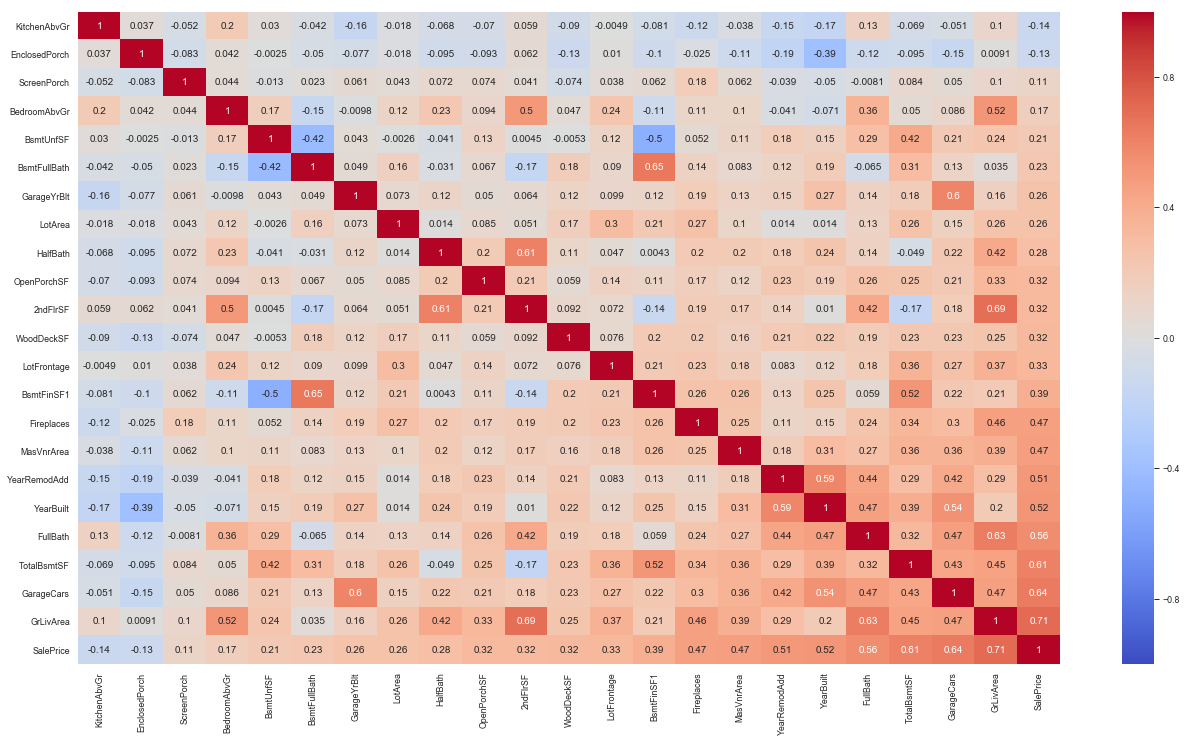

In [34]:
# Check new correlations
f_num_corr_matrix = f_train[n_cols].corr()
fig, ax = plt.subplots(figsize=(22, 12))
sns.heatmap(f_num_corr_matrix, ax=ax, annot=True, cmap='coolwarm', vmin=-1., vmax=1.)

Text(0.5, 1.0, 'Correlation with Sale Price')

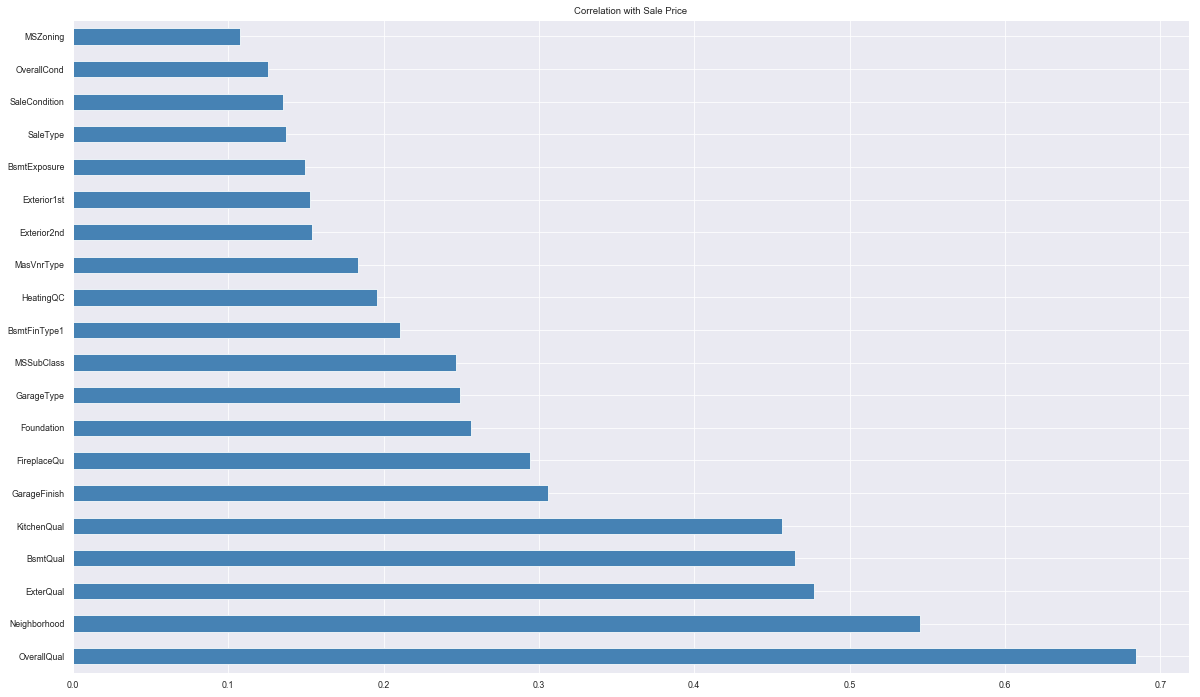

In [35]:
# Filtered results
f_cat_corr_target = pd.Series([correlation_ratio(f_train[c], f_train['SalePrice']) for c in c_cols], index=c_cols)

f_cat_corr_target.sort_values(ascending=False).plot.barh(color='steelblue', figsize=(20, 12));
plt.title('Correlation with Sale Price')

**Assim, com as features filtradas, resta apenas os dados mais relacionados com a nossa variável alvo.**

Visualizar a variável alvo com as mais correlacionadas.

In [36]:
# Dynamic plot
from bokeh.plotting import output_file, figure, show
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook

# Notebook mode
output_notebook()

# New sample for manipulated df
x = f_train['GrLivArea']
y = f_train['SalePrice']
TOOLS = "hover,pan,wheel_zoom,box_zoom,reset,save"
p = figure(title="Ground Living Area X Sale Price", tools=TOOLS,
           y_range=(y.min(), y.max()), x_range=(x.min(), x.max()))

p.circle('GrLivArea', 'SalePrice', source=f_train)
# Linear Regression
slope, intercept = np.polyfit(x, y, 1)
reg_x = np.linspace(x.min(), x.max())
p.line(reg_x, reg_x*slope+intercept, color='red')
p.xaxis[0].axis_label = 'Square Feet (ft²)'
p.yaxis[0].axis_label = 'Price ($)'

p.hover.tooltips = [
    # add to this
    ("(Ground Living Area, Sale Price)", "($x, $y)"),
]
show(p)

# Check correlation between variables
# sns.scatterplot(x='distance', y='fare_amount', data=f_train[columns].sample(100000))

Loading BokehJS ...

Text(0.5, 1.0, 'Overall Quality x Price')

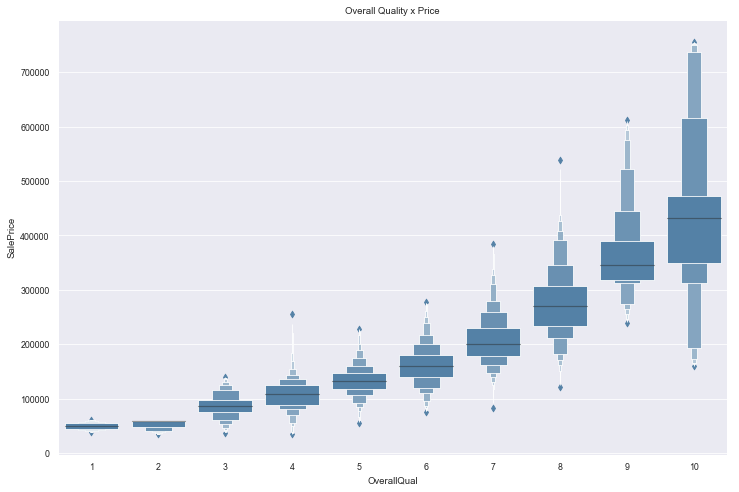

In [37]:
# Generate dynamic boxplot
y = f_train["SalePrice"].copy()
x = f_train["OverallQual"].copy()
# Boxplot of categorical feature
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxenplot(x, y, color='steelblue', ax=ax)
ax.set_title("Overall Quality x Price")

De fato, podemos ver uma clara relação enetre as variáveis nesse gráficos.

# Machine Learning - Criação de Modelos


Com os dados limpos e modificados, podemos prepará-los para modelos de ML/DL. 

In [38]:
# Recap of data types
f_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
Neighborhood     1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
Exterior1st      1460 non-null category
Exterior2nd      1460 non-null category
MasVnrType       1460 non-null category
ExterQual        1460 non-null category
Foundation       1460 non-null category
BsmtQual         1460 non-null category
BsmtExposure     1460 non-null category
BsmtFinType1     1460 non-null category
HeatingQC        1460 non-null category
KitchenQual      1460 non-null category
FireplaceQu      1460 non-null category
GarageType       1460 non-null category
GarageFinish     1460 non-null category
SaleType         1460 non-null category
SaleCondition    1460 non-null category
KitchenAbvGr     1460 non-null int64
EnclosedPorch    1460 non-null int64
ScreenPorch      14

In [39]:
# Recap of data format
print(f_train.shape)
f_train.head()

(1460, 43)


,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,...,BsmtFinSF1,Fireplaces,MasVnrArea,YearRemodAdd,YearBuilt,FullBath,TotalBsmtSF,GarageCars,GrLivArea,SalePrice
0,60,RL,CollgCr,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,...,706,0,196.0,2003,2003,2,856,2,1710,208500
1,20,RL,Veenker,6,8,MetalSd,MetalSd,None,TA,CBlock,...,978,1,0.0,1976,1976,2,1262,2,1262,181500
2,60,RL,CollgCr,7,5,VinylSd,VinylSd,BrkFace,Gd,PConc,...,486,1,162.0,2002,2001,2,920,2,1786,223500
3,70,RL,Crawfor,7,5,Wd Sdng,Wd Shng,None,TA,BrkTil,...,216,1,0.0,1970,1915,1,756,3,1717,140000
4,60,RL,NoRidge,8,5,VinylSd,VinylSd,BrkFace,Gd,PConc,...,655,1,350.0,2000,2000,2,1145,3,2198,250000


## Preparando as Variáveis para os Modelos
Agora, vamos manipular as variáveis para que elas reflitam corretamente o seu significado no modelo.

1. **Removendo Variáveis de Identificação**: Nesse caso, isso já foi feito durante o **Feature Engineering**.
2. **Modificando Variáveis Categóricas**: Todas as variáveis categóricas devem ser mapeadas usando o técnica de *One-hot encoding*.
3. **Preparando Variáveis Cíclicas**: Não há veriáveis cíclicas.
4. **Ajustando a Magnitude das Variáveis Numéricas**: Outra etapa muito importante que tem o propósito de ignorar a intensidade absoluta das variáveis. Assim, dando ênfase as variações relativas.
5. **Separando a Variável Alvo**: Nesse caso, iremos separa a variável `SalePrice` do restante do dataset.
6. **Dividindo o Dataset em Treino/Teste**: Usaremos uma proporção de 80% treino 20% teste.


In [40]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [49]:
# Managing categorical variables
cat_cols = f_train.select_dtypes('category').columns
df_dummies = pd.get_dummies(f_train[cat_cols], prefix=cat_cols, drop_first=True)
X_cat = df_dummies
X_cat.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [53]:
# Scaling numeric variables
scaler = RobustScaler()
scale_features = list(f_train.select_dtypes(exclude='category').columns)
scale_features.remove('SalePrice')
X_num = f_train[scale_features].copy()
X_num[scale_features] = scaler.fit_transform(f_train[scale_features].values)
X_num.head()

,KitchenAbvGr,EnclosedPorch,ScreenPorch,BedroomAbvGr,BsmtUnfSF,BsmtFullBath,LotFrontage,GarageYrBlt,LotArea,HalfBath,...,WoodDeckSF,BsmtFinSF1,Fireplaces,MasVnrArea,YearRemodAdd,YearBuilt,FullBath,TotalBsmtSF,GarageCars,GrLivArea
0,0.0,0.0,0.0,0.0,-0.559829,1.0,0.054054,0.604651,-0.254076,1.0,...,0.000000,0.452790,-1.0,1.193303,0.243243,0.652174,0.0,-0.269652,0.0,0.380070
1,0.0,0.0,0.0,0.0,-0.330769,0.0,0.459459,-0.023256,0.030015,0.0,...,1.773810,0.834679,0.0,0.000000,-0.486486,0.065217,0.0,0.538308,0.0,-0.312090
2,0.0,0.0,0.0,0.0,-0.074359,1.0,0.135135,0.558140,0.437624,1.0,...,0.000000,0.143910,0.0,0.986301,0.216216,0.608696,0.0,-0.142289,0.0,0.497489
3,0.0,272.0,0.0,0.0,0.106838,1.0,-0.081081,0.488372,0.017663,0.0,...,0.000000,-0.235170,0.0,0.000000,-0.648649,-1.260870,-1.0,-0.468657,1.0,0.390885
4,0.0,0.0,0.0,1.0,0.021368,1.0,0.567568,0.534884,1.181201,1.0,...,1.142857,0.381186,0.0,2.130898,0.162162,0.586957,0.0,0.305473,1.0,1.134029


In [106]:
# Features and target
X = pd.concat([X_num, X_cat], axis=1)
y = f_train['SalePrice']
X.head()

,KitchenAbvGr,EnclosedPorch,ScreenPorch,BedroomAbvGr,BsmtUnfSF,BsmtFullBath,LotFrontage,GarageYrBlt,LotArea,HalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,0.0,-0.559829,1.0,0.054054,0.604651,-0.254076,1.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.0,0.0,0.0,-0.330769,0.0,0.459459,-0.023256,0.030015,0.0,...,0,0,0,0,1,0,0,0,1,0
2,0.0,0.0,0.0,0.0,-0.074359,1.0,0.135135,0.558140,0.437624,1.0,...,0,0,0,0,1,0,0,0,1,0
3,0.0,272.0,0.0,0.0,0.106838,1.0,-0.081081,0.488372,0.017663,0.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,0.0,0.0,1.0,0.021368,1.0,0.567568,0.534884,1.181201,1.0,...,0,0,0,0,1,0,0,0,1,0


In [107]:
print(X.shape)
print(y.shape)

(1460, 170)
(1460,)


In [108]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 170)
(1168,)
(292, 170)
(292,)


## Testando Modelos

Com os dados prontos para os modelos, podemos testá-los aplicando vários modelos. Inicialmente, os seguintes modelos foram testados:
- Regressão Linear: Modelo linear simples.
- Árvore de Decisão: Modelo de árvore simples.
- Random Forest: Conjunto de modelo de árvore.
- Boosting Algorithms: Algoritmos amplamente usados, similar ao random forest, mas com regularização.

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [111]:
# SKlearn Models
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()

# Scores with x-validation
lin_scores = cross_val_score(lin_reg, 
                             X_train, 
                             y_train,
                             scoring = "neg_mean_squared_error", 
                             cv = 10)

decision_scores = cross_val_score(tree_reg,
                                  X_train, 
                                  y_train,
                                  scoring = "neg_mean_squared_error", 
                                  cv = 10)

forest_scores = cross_val_score(forest_reg,
                                X_train, 
                                y_train,
                                scoring = "neg_mean_squared_error", 
                                cv = 10)

In [132]:
# Boost Models
xgb_reg = xgb.XGBRegressor(n_jobs=12).fit(X_train, y_train)

# Scores with x-validation
xgb_scores = cross_val_score(xgb_reg, 
                             X_train, 
                             y_train,
                             scoring = "neg_mean_squared_error", 
                             cv = 10)

In [121]:
# Test Results
lin_rmse_scores = np.sqrt(-lin_scores)
decision_rmse_scores = np.sqrt(-decision_scores)
forest_rmse_scores = np.sqrt(-forest_scores)
xgb_rmse_scores = np.sqrt(-xgb_scores)
# decision_rmse_test = mean_squared_error(y_test, tree_reg.predict(X_test))
# forest_rmse_test = mean_squared_error(y_test, forest_reg.predict(X_test))
# xgb_rmse_test = mean_squared_error(y_test, xgb_reg.predict(X_test))

# Results
print("Linear Regression Results:")
# print(f"Test MSE: {lin_rmse_test:.2f}")
print(f"CV RMSE: {lin_rmse_scores.mean():.2f} +/- {lin_rmse_scores.std() * 2:.2f}\n")
print("Decision Tree Regressor Results:")
# print(f"Test MSE: {decision_rmse_test:.2f}")
print(f"CV RMSE: {decision_rmse_scores.mean():.2f} +/- {decision_rmse_scores.std() * 2:.2f}\n")
print("Random Forest Regressor Results:")
# print(f"Test MSE: {forest_rmse_test:.2f}")
print(f"CV RMSE: {forest_rmse_scores.mean():.2f} +/- {forest_rmse_scores.std() * 2:.2f}\n")
print("X-Gradient Boosting Results:")
# print(f"Test MSE: {xgb_rmse_test:.2f}")
print(f"CV RMSE: {xgb_rmse_scores.mean():.2f} +/- {xgb_rmse_scores.std() * 2:.2f}\n")

Linear Regression Results:
CV RMSE: 33229.10 +/- 20531.27

Decision Tree Regressor Results:
CV RMSE: 43580.19 +/- 16222.41

Random Forest Regressor Results:
CV RMSE: 34313.26 +/- 14578.60

X-Gradient Boosting Results:
CV RMSE: 29194.37 +/- 10351.45



## Sintonizando Hyper-parâmetros

Vamos testar vários valores de hyper-parametros para encontrarmos o melhor resultado possível do modelo.

In [122]:
from sklearn.model_selection import GridSearchCV

In [101]:
y_train.shape

(1168, 1)

In [123]:
# Grid of parameters
parameters = {'max_depth': range(2, 10, 2),
              'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators': range(200, 1100, 200),
              }
fit_parameters = {'early_stopping_rounds':range(4, 12, 2),
                  'eval_set': (X_test, y_test)
                  }
grid_reg = GridSearchCV(xgb_reg,
                        parameters,
                        scoring='neg_mean_squared_error',
                        cv= 10,
                        n_jobs=12)
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=12, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=12,
       param_grid={'max_depth': range(2, 10, 2), 'learning_rate': [0.1, 0.05, 0.01], 'n_estimators': range(200, 1100, 200)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [124]:
xgb_rmse_test = mean_squared_error(y_test, grid_reg.best_estimator_.predict(X_test))

# Results
print(f"Best Parameters: {grid_reg.best_params_}")
print(f"Best Mean CV Score: {np.sqrt(-grid_reg.best_score_):.2f}")
print(f"Test MSE: {np.sqrt(xgb_rmse_test):.2f}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 1000}
Best Mean CV Score: 29093.12
Test MSE: 30568.65


## Resultados

Aqui estão os resultados obtidos dos modelos testados.

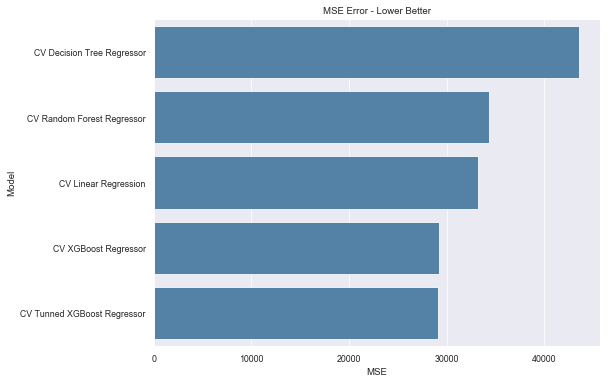

In [126]:
modelos = ["CV Decision Tree Regressor", "CV Random Forest Regressor", "CV Linear Regression",
           "CV XGBoost Regressor", "CV Tunned XGBoost Regressor"]
mses = [decision_rmse_scores.mean(), forest_rmse_scores.mean(), lin_rmse_scores.mean(),
        xgb_rmse_scores.mean(), np.sqrt(-grid_reg.best_score_)]

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("MSE")
ax.set_ylabel("Model")
ax.set_title("MSE Error - Lower Better")
sns.barplot(y=modelos, x=mses, color="steelblue", ax=ax)


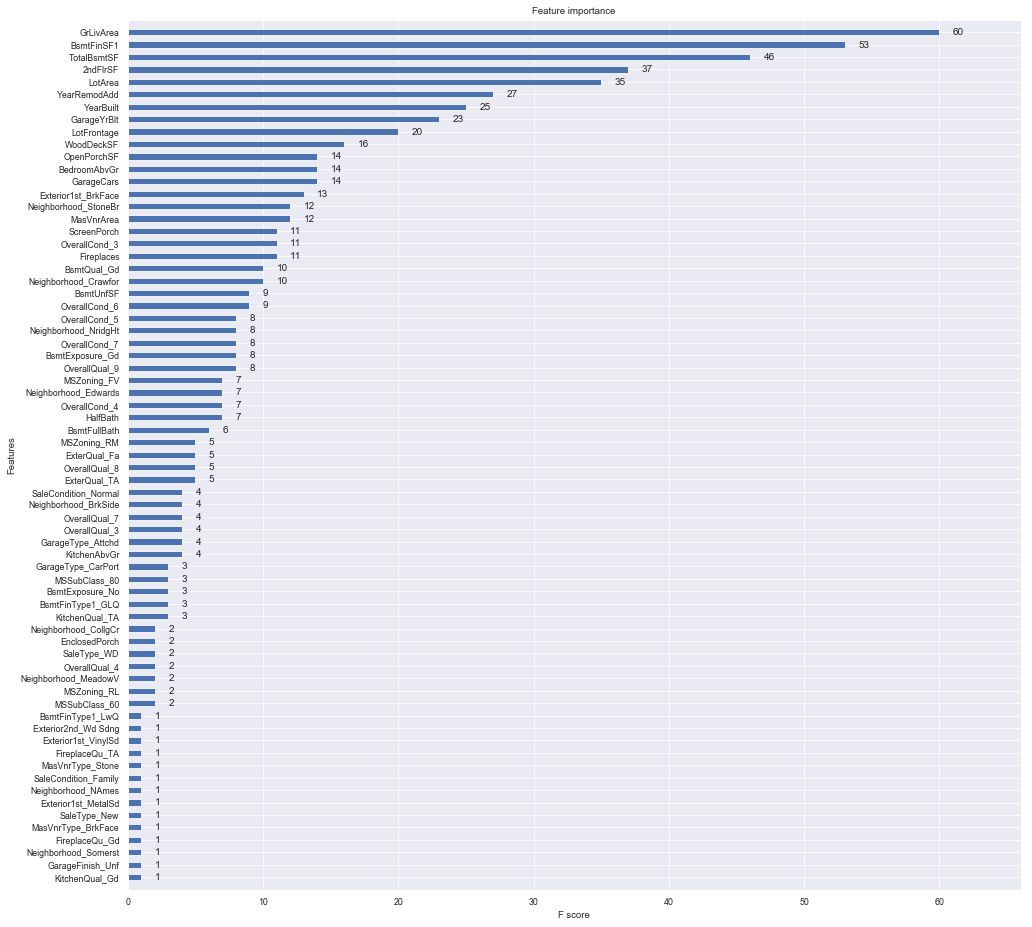

In [130]:
afig, ax = plt.subplots(figsize=(16, 16))
xgb.plot_importance(xgb_reg, height=.5, ax=ax)

## Possíveis Melhorias

- Utilizar mais dados
- Continuar procurando melhores hyper-parâmetros
- Aplicar Deep Learning


# Save Model

Submissão no Kaggle compara resultados.

In [133]:
# Save model
import pickle
pickle.dump(grid_reg.best_estimator_, open("model_house.pt", "wb"))

In [41]:
# Load model
import pickle
best_model = pickle.load(open("model_house.pt", "rb"))

# Submission

In [43]:
# Test Data
test = pd.read_csv("data_house/test.csv", infer_datetime_format=True)

In [44]:
# Cleaning
c_test = test.copy()

# Imput categorical columns
miss_cat_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PoolQC', 'Fence', 'MiscFeature']
c_test[miss_cat_cols] = test[miss_cat_cols].fillna('None')

# Tranform numerical variables in categorical variables
cat_feat = ['MSSubClass', 'OverallQual', 'OverallCond'] + list(train.select_dtypes('object').columns)
c_test[cat_feat] = c_test[cat_feat].astype('category')

print(f"Empty entries: {c_test[miss_cat_cols].isna().sum().sum()}")
c_test[miss_cat_cols].head()

Empty entries: 0


,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,None,None,TA,TA,No,Rec,LwQ,SBrkr,None,Attchd,Unf,TA,TA,None,MnPrv,None
1,None,BrkFace,TA,TA,No,ALQ,Unf,SBrkr,None,Attchd,Unf,TA,TA,None,None,Gar2
2,None,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,Attchd,Fin,TA,TA,None,MnPrv,None
3,None,BrkFace,TA,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,Fin,TA,TA,None,None,None
4,None,None,Gd,TA,No,ALQ,Unf,SBrkr,None,Attchd,RFn,TA,TA,None,None,None


In [45]:
# Imput numeric columns
c_test['LotFrontage'] = test.LotFrontage.fillna(train.LotFrontage.median())
c_test['MasVnrArea'] = test.MasVnrArea.fillna(0)
c_test['GarageYrBlt'] = test.GarageYrBlt.fillna(0)

print(f"Empty entries: {c_test.isna().sum().sum()}")
c_test.head()

Empty entries: 22


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,144,0,None,None,None,0,1,2010,WD,Normal


In [48]:
# Filter Data
f_cols_test = f_cols[:-1]
f_test = c_test[f_cols_test]
f_test.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,...,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,YearRemodAdd,YearBuilt,FullBath,TotalBsmtSF,GarageCars,GrLivArea
0,20,RH,NAmes,5,6,VinylSd,VinylSd,None,TA,CBlock,...,80.0,468.0,0,0.0,1961,1961,1,882.0,1.0,896
1,20,RL,NAmes,6,6,Wd Sdng,Wd Sdng,BrkFace,TA,CBlock,...,81.0,923.0,0,108.0,1958,1958,1,1329.0,1.0,1329
2,60,RL,Gilbert,5,5,VinylSd,VinylSd,None,TA,PConc,...,74.0,791.0,1,0.0,1998,1997,2,928.0,2.0,1629
3,60,RL,Gilbert,6,6,VinylSd,VinylSd,BrkFace,TA,PConc,...,78.0,602.0,1,20.0,1998,1998,2,926.0,2.0,1604
4,120,RL,StoneBr,8,5,HdBoard,HdBoard,None,Gd,PConc,...,43.0,263.0,0,0.0,1992,1992,2,1280.0,2.0,1280


In [ ]:
# PReprocessing data